In [5]:
import pandas as pd
from matplotlib import pyplot as plt

def read_dataset(fname):
    data = pd.read_csv(fname,index_col = 0)
    data.drop(['Name','Ticket','Cabin'],axis = 1,inplace=True)
    data['Sex'] = (data['Sex']=='male').astype('int')
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n:labels.index(n))
    data = data.fillna(0)
    return data
    
train = read_dataset('titanic/train.csv')
print(train[:5])

             Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                              
1                   0       3    1  22.0      1      0   7.2500         0
2                   1       1    0  38.0      1      0  71.2833         1
3                   1       3    0  26.0      0      0   7.9250         0
4                   1       1    0  35.0      1      0  53.1000         0
5                   0       3    1  35.0      0      0   8.0500         0


In [6]:
from sklearn.model_selection import train_test_split
y = train['Survived'].values
X = train.drop(['Survived'],axis=1).values

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2)
print('train dataset:{0};test dataset:{1}'.format(X_train.shape,X_test.shape))

train dataset:(712, 7);test dataset:(179, 7)


In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
train_score = clf.score(X_train,Y_train)
test_score = clf.score(X_test,Y_test)
print('train score:{0};test score:{1}'.format(train_score,test_score))

train score:0.9831460674157303;test score:0.7932960893854749


In [8]:
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train,Y_train)
    tr_score = clf.score(X_train,Y_train)
    cv_score = clf.score(X_test,Y_test)
    return (tr_score,cv_score)


In [9]:
import numpy as np

depths = range(2,15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('best depth:{0};best score:{1}'.format(best_param,best_score))



best depth:4;best score:0.8379888268156425


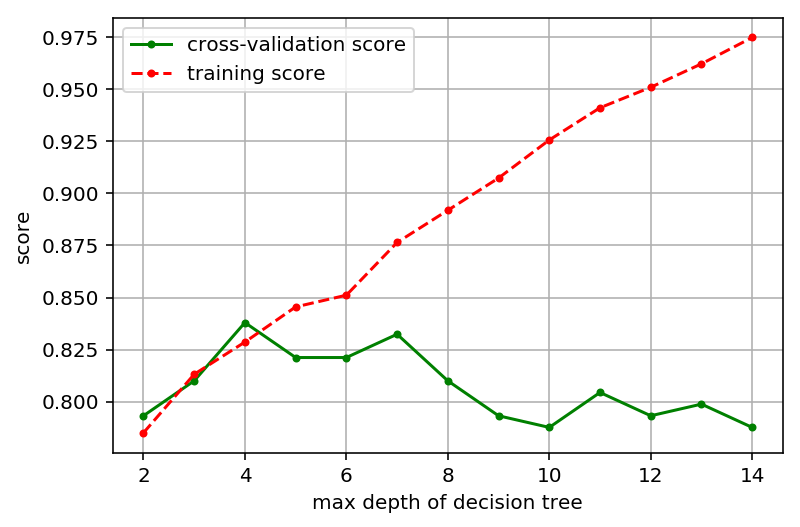

In [10]:
plt.figure(figsize = (6,4),dpi = 144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths,cv_scores,'.g-',label='cross-validation score')
plt.plot(depths,tr_scores,'.r--',label = 'training score')
plt.legend()

best param: 0.0; best score: 0.8156424581005587


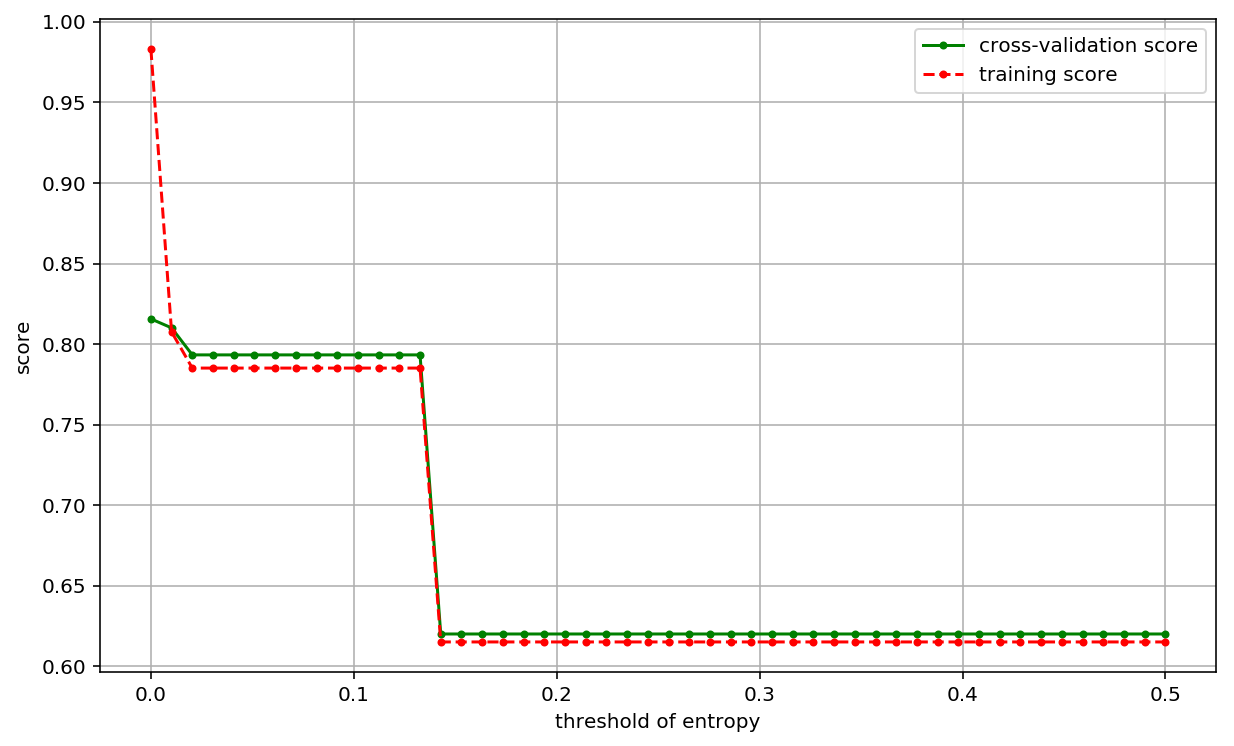

In [11]:

# 训练模型，并计算评分
def cv_score(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_decrease=val)
    clf.fit(X_train, Y_train)
    tr_score = clf.score(X_train, Y_train)
    cv_score = clf.score(X_test, Y_test)
    return (tr_score, cv_score)

# 指定参数范围，分别训练模型，并计算评分
values = np.linspace(0, 0.5, 50)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出评分最高的模型参数
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

# 画出模型参数与模型评分的关系
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

beat param:{'min_impurity_split': 0.21428571428571427}
 best score:0.819304152637486


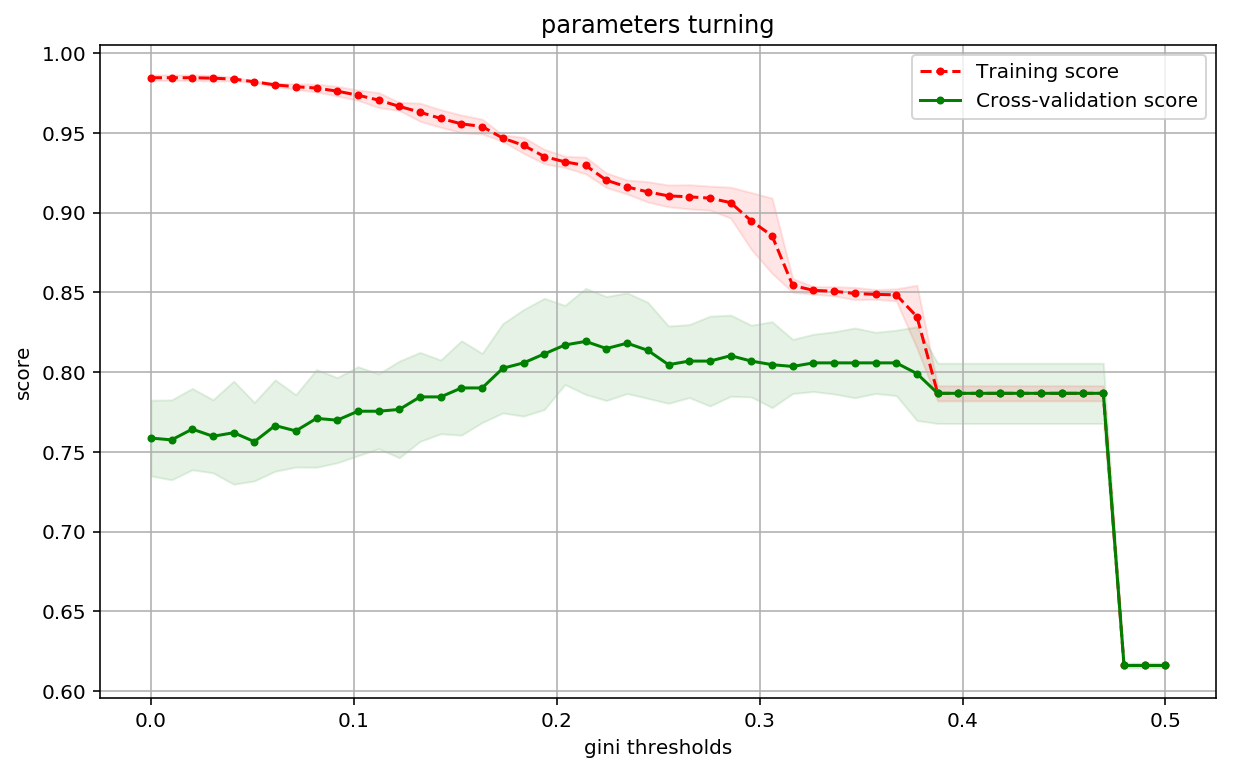

In [12]:
import warnings

warnings.filterwarnings("ignore")
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.5, 50)
#param_grid = {'min_impurity_decrease': thresholds} #这里有问题有问题，这两句和代码库有出入
param_grid = {'min_impurity_split':thresholds}#都是树的分裂问题
#clf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 5)
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
clf.fit(X,y)
print('beat param:{0}\n best score:{1}'.format(clf.best_params_,clf.best_score_))
plot_curve(thresholds,clf.cv_results_,xlabel = 'gini thresholds')



best param: {'min_impurity_decrease': 0.01020408163265306}
best score: 0.7946127946127947


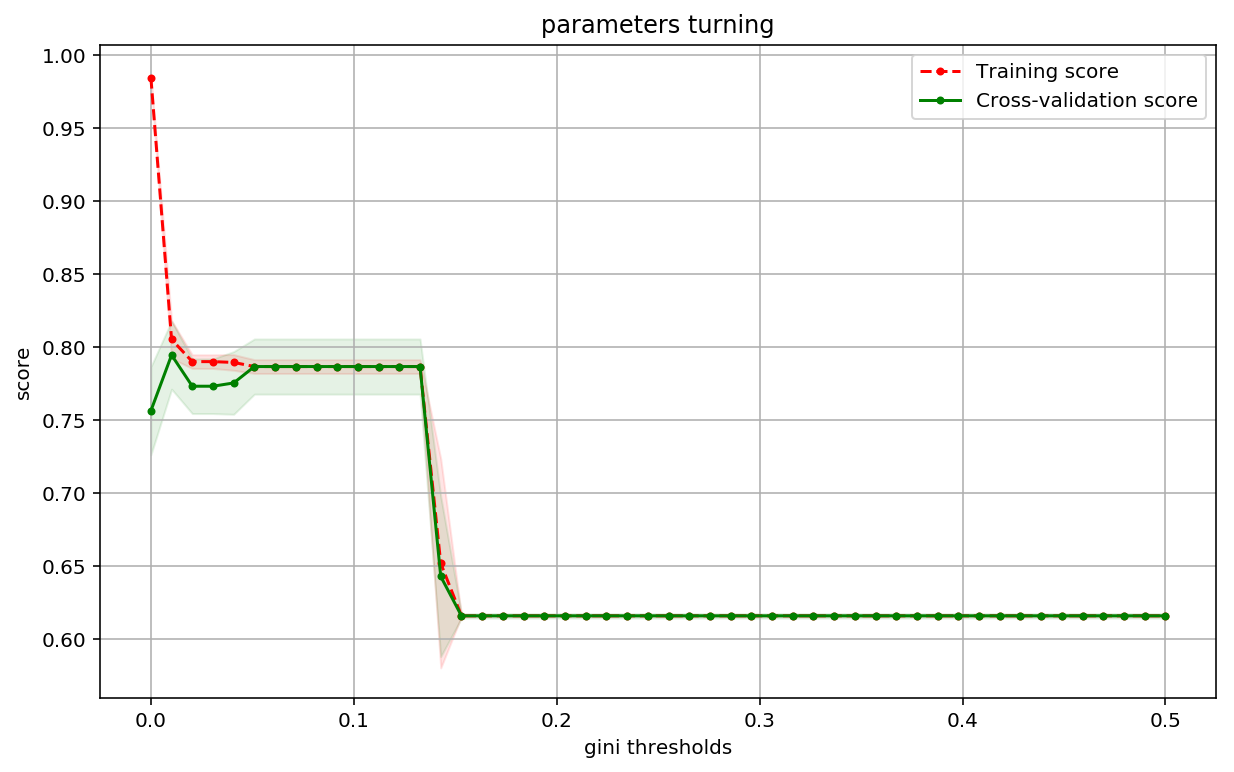

In [13]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.5, 50)
# Set the parameters by cross-validation
param_grid = {'min_impurity_decrease': thresholds}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')


In [14]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

entropy_thresholds = np.linspace(0,1,50)
gini_thresholds = np.linspace(0,0.5,50)

param_grid = [{'criterion':['entropy'],
               'min_impurity_split':entropy_thresholds},
              {'criterion':['gini'],
               'min_impurity_split':gini_thresholds},
              {'max_depth':range(2,10)},
              {'min_samples_split':range(2,30,2)}]

clf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 5)
clf.fit(X,y)
print("best param:{0}\nbest score:{1}".format(clf.best_params_,clf.best_score_))

best param:{'criterion': 'entropy', 'min_impurity_split': 0.5306122448979591}
best score:0.8294051627384961


In [15]:
clf = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.002857142857142857)
clf.fit(X_train, Y_train)
train_score = clf.score(X_train, Y_train)
test_score = clf.score(X_test, Y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

# 导出 titanic.dot 文件
with open("titanic.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

train score: 0.9073033707865169; test score: 0.8435754189944135


NameError: name 'export_graphviz' is not defined

In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def read_data(str1):
    data = pd.read_csv(str1,index_col=0)
    data.drop(['Name','Ticket','Cabin'],axis = 1,inplace=True)
    data['Sex'] = (data['Sex'] =='female').astype('int')
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))
    data = data.fillna(0)
    return data
    
data = read_data('titanic/train.csv')
print(data.head(5))
Y = data['Survived'].values
X = data.drop(['Survived'],axis = 1).values

model = DecisionTreeClassifier()
model.fit(X,Y)
train_score = model.score(X,Y)

data_test = read_data('titanic/test.csv')
print(data_test[:5])
X_test = data_test.values
Y_test = model.predict(X_test)

def get_csv1(str1,y_pred):
    data = pd.read_csv(str1)
    data['Survived'] = y_pred
    data.to_csv('gender_submission.csv',columns=['PassengerId','Survived'],header=True,index=False)

get_csv1('titanic/test.csv',Y_test)

             Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                              
1                   0       3    0  22.0      1      0   7.2500         0
2                   1       1    1  38.0      1      0  71.2833         1
3                   1       3    1  26.0      0      0   7.9250         0
4                   1       1    1  35.0      1      0  53.1000         0
5                   0       3    0  35.0      0      0   8.0500         0
             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
892               3    0  34.5      0      0   7.8292         0
893               3    1  47.0      1      0   7.0000         1
894               2    0  62.0      0      0   9.6875         0
895               3    0  27.0      0      0   8.6625         1
896               3    1  22.0      1      1  12.2875         1
